In [47]:
import pandas as pd

In [48]:
df_fish = pd.read_excel('fish_data.xlsx')

In [49]:
df_fish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [50]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [51]:
df_fish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [52]:
df_fish['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

In [53]:
x = df_fish.iloc[:,1:].values
y = df_fish.iloc[:, 0].values
print(x.shape)
print(y.shape)

(4080, 3)
(4080,)


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean').fit(x_train,y_train)
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [57]:
y_pred = knn.predict(x_test)

In [58]:
y_pred

array(['Puntius lateristriga', 'Pethia conchonius', 'Otolithoides pama',
       'Pethia conchonius', 'Polynemus paradiseus',
       'Sillaginopsis panijus', 'Puntius lateristriga',
       'Polynemus paradiseus', 'Sillaginopsis panijus',
       'Otolithoides biauritus', 'Polynemus paradiseus',
       'Otolithoides pama', 'Otolithoides biauritus', 'Pethia conchonius',
       'Otolithoides biauritus', 'Otolithoides pama', 'Setipinna taty',
       'Coilia dussumieri', 'Sillaginopsis panijus', 'Otolithoides pama',
       'Setipinna taty', 'Coilia dussumieri', 'Otolithoides biauritus',
       'Puntius lateristriga', 'Anabas testudineus', 'Coilia dussumieri',
       'Puntius lateristriga', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Polynemus paradiseus',
       'Otolithoides pama', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Setipinna taty', 'Sillaginopsis panijus', 'Pethia conchonius',
       'Pethia c

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [60]:
print("nilai akurasi ", accuracy_score(y_test,y_pred))

nilai akurasi  0.9325980392156863


                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        97
     Coilia dussumieri       1.00      0.99      0.99        96
Otolithoides biauritus       0.71      0.78      0.74       100
     Otolithoides pama       0.99      1.00      0.99        85
     Pethia conchonius       1.00      1.00      1.00        84
  Polynemus paradiseus       1.00      1.00      1.00        85
  Puntius lateristriga       1.00      1.00      1.00        74
        Setipinna taty       0.76      0.69      0.72       103
 Sillaginopsis panijus       1.00      1.00      1.00        92

              accuracy                           0.93       816
             macro avg       0.94      0.94      0.94       816
          weighted avg       0.93      0.93      0.93       816



<Axes: >

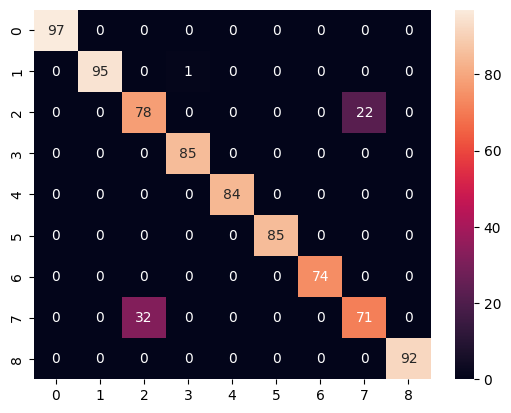

In [61]:
print(classification_report(y_test,y_pred))
sb.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [62]:
k_akurasi = []
for k in range (1,50):
     knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean').fit(x_train, y_train)
     y_prediksi = knn.predict(x_test)
     Akurasi = accuracy_score(y_test,y_prediksi)
     k_akurasi.append(Akurasi)
print(k_akurasi)

[0.9264705882352942, 0.9264705882352942, 0.9325980392156863, 0.9325980392156863, 0.9338235294117647, 0.9325980392156863, 0.9325980392156863, 0.928921568627451, 0.9325980392156863, 0.9338235294117647, 0.9387254901960784, 0.9399509803921569, 0.9411764705882353, 0.9436274509803921, 0.9448529411764706, 0.9448529411764706, 0.9448529411764706, 0.9436274509803921, 0.9399509803921569, 0.9424019607843137, 0.9411764705882353, 0.9424019607843137, 0.9411764705882353, 0.9448529411764706, 0.9411764705882353, 0.9436274509803921, 0.9424019607843137, 0.9448529411764706, 0.9436274509803921, 0.9448529411764706, 0.9424019607843137, 0.9448529411764706, 0.9448529411764706, 0.946078431372549, 0.9411764705882353, 0.9436274509803921, 0.9436274509803921, 0.9424019607843137, 0.9424019607843137, 0.9399509803921569, 0.9424019607843137, 0.9424019607843137, 0.9436274509803921, 0.9411764705882353, 0.9424019607843137, 0.9411764705882353, 0.9411764705882353, 0.9424019607843137, 0.9399509803921569]


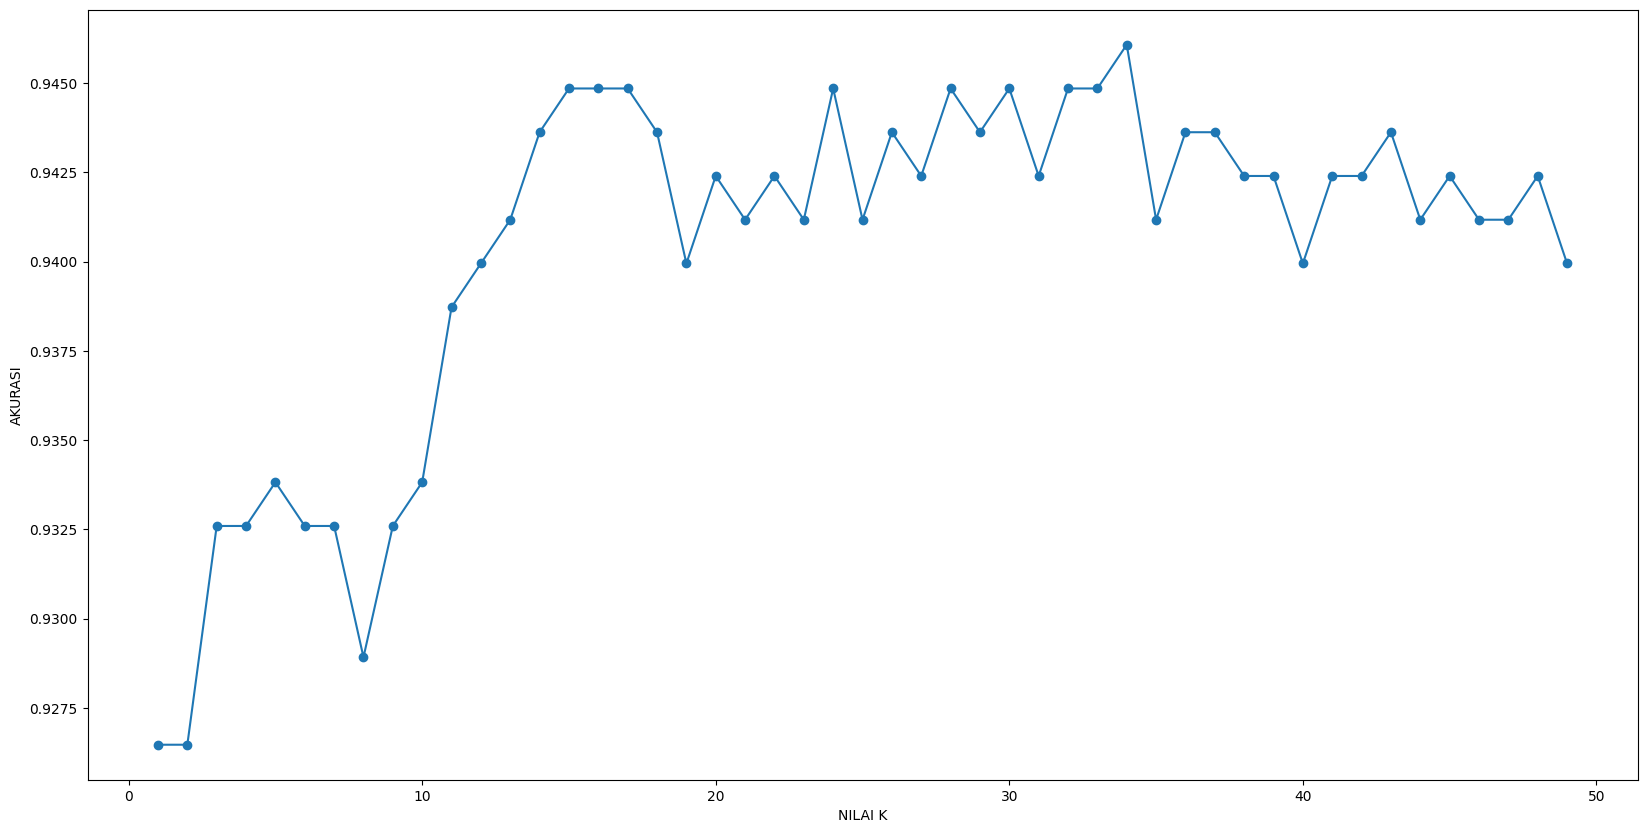

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(range (1,50), k_akurasi, marker='o', linestyle='-')
plt.xlabel('NILAI K')
plt.ylabel('AKURASI')
plt.show()

In [64]:
import pandas as pd

data_baru = pd.read_excel('new_fish.xlsx')


In [65]:
data_baru.head()

,species,length,weight,w_l_ratio
0,Puntius lateristriga,27.132439,2.221438,0.229397
1,Otolithoides pama,18.051787,5.063211,0.626904
2,Setipinna taty,12.078396,2.520177,0.310181
3,Pethia conchonius,21.971759,3.912787,0.098508
4,Puntius lateristriga,7.221116,2.905289,0.273240


In [ ]:
x = data_baru.drop('species', axis=1)
y = data_baru['species']

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)  # Melatih model dengan data lama

# Prediksi dengan data baru
prediksi = knn.predict(x)

# Menampilkan hasil prediksi
print(prediksi)

['Otolithoides biauritus' 'Otolithoides pama' 'Anabas testudineus'
 'Pethia conchonius' 'Anabas testudineus' 'Anabas testudineus'
 'Otolithoides biauritus' 'Otolithoides biauritus' 'Pethia conchonius'
 'Otolithoides pama' 'Otolithoides pama' 'Pethia conchonius'
 'Otolithoides biauritus' 'Pethia conchonius' 'Anabas testudineus'
 'Coilia dussumieri' 'Pethia conchonius' 'Pethia conchonius'
 'Coilia dussumieri' 'Pethia conchonius' 'Otolithoides pama'
 'Otolithoides pama' 'Coilia dussumieri' 'Anabas testudineus'
 'Puntius lateristriga' 'Otolithoides biauritus' 'Otolithoides pama'
 'Anabas testudineus' 'Anabas testudineus' 'Coilia dussumieri'
 'Otolithoides biauritus' 'Pethia conchonius' 'Coilia dussumieri'
 'Sillaginopsis panijus' 'Pethia conchonius' 'Anabas testudineus'
 'Otolithoides pama' 'Anabas testudineus' 'Otolithoides biauritus'
 'Sillaginopsis panijus' 'Sillaginopsis panijus' 'Pethia conchonius'
 'Otolithoides pama' 'Otolithoides biauritus' 'Otolithoides biauritus'
 'Coilia dussumi

In [69]:
# Gabungkan data lama dan data baru
X_combined = pd.concat([x_train, x])
y_combined = pd.concat([y_train, y])

# Melatih ulang model dengan data gabungan
knn.fit(X_combined, y_combined)


KNeighborsClassifier(n_neighbors=3)

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [71]:
y_pred = knn.predict(x_test)

In [72]:
print("nilai akurasi ", accuracy_score(y_test,y_pred))

nilai akurasi  0.1


                        precision    recall  f1-score   support

    Anabas testudineus       0.00      0.00      0.00         0
     Coilia dussumieri       0.00      0.00      0.00         2
Otolithoides biauritus       0.50      1.00      0.67         1
     Otolithoides pama       0.00      0.00      0.00         0
     Pethia conchonius       0.00      0.00      0.00         0
  Polynemus paradiseus       0.00      0.00      0.00         0
  Puntius lateristriga       0.00      0.00      0.00         2
        Setipinna taty       0.00      0.00      0.00         3
 Sillaginopsis panijus       0.00      0.00      0.00         2

              accuracy                           0.10        10
             macro avg       0.06      0.11      0.07        10
          weighted avg       0.05      0.10      0.07        10



c:\Users\alif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

<Axes: >

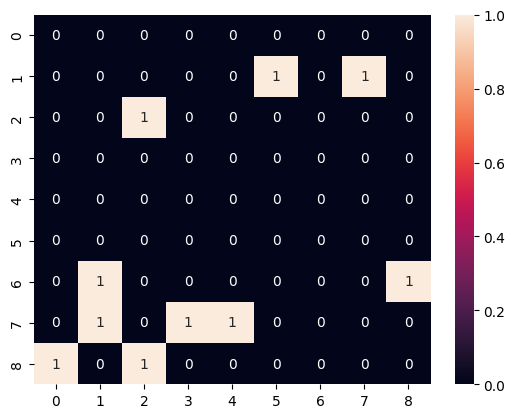

In [73]:
print(classification_report(y_test,y_pred))
sb.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [78]:
# Jumlah sampel pelatihan
n_samples = len(x_train)

# Menyimpan akurasi untuk setiap nilai k
k_akurasi = []
for k in range(1, n_samples + 1):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(x_train, y_train)
    y_prediksi = knn.predict(x_test)
    akurasi = accuracy_score(y_test, y_prediksi)
    k_akurasi.append(akurasi)
print(k_akurasi)


[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


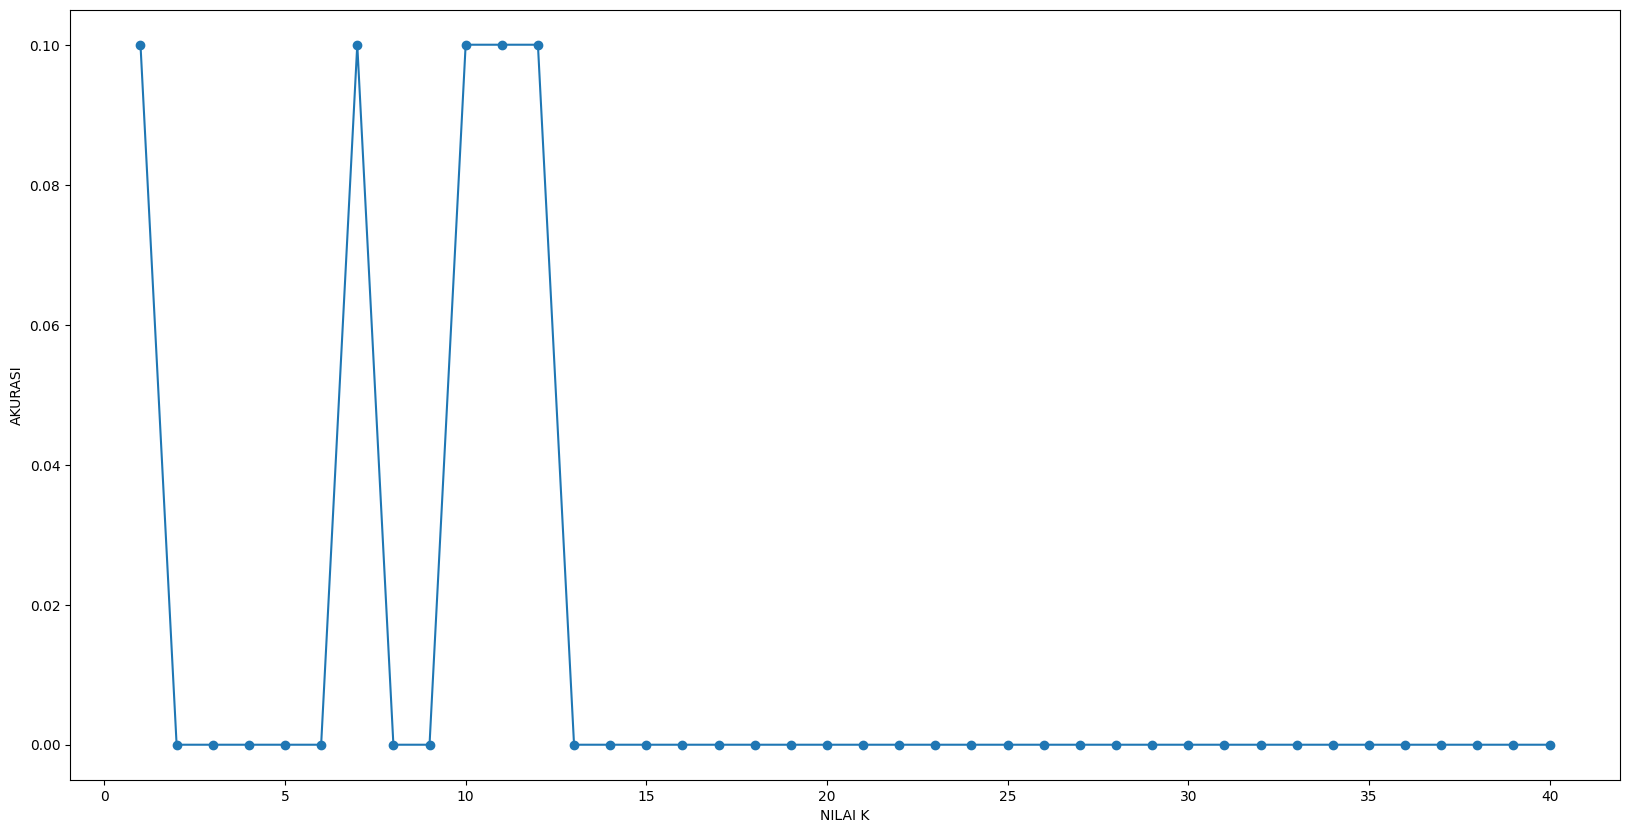

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(range (1, n_samples + 1), k_akurasi, marker='o', linestyle='-')
plt.xlabel('NILAI K')
plt.ylabel('AKURASI')
plt.show()